In [8]:
import jieba
from os import path
#from scipy.misc import imread
import matplotlib.pyplot as plt
import os
import numpy as np

from PIL import Image

# jieba.load_userdict("txt\userdict.txt")
# add userdict by load_userdict()
from wordcloud import WordCloud, ImageColorGenerator

In [33]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
d

'/home/jovyan/01_worldcloud'

In [34]:
stopwords_path = d + '/data/wc_cn/stopwords_cn_en.txt'
# Chinese fonts must be set
font_path = d + '/data/fonts/SourceHanSerif/SourceHanSerifK-Light.otf'
print(stopwords_path)
print(font_path)

/home/jovyan/01_worldcloud/data/wc_cn/stopwords_cn_en.txt
/home/jovyan/01_worldcloud/data/fonts/SourceHanSerif/SourceHanSerifK-Light.otf


In [43]:
# the path to save worldcloud
imgname1 = 'data/wc_cn/LuXun.jpg'
imgname2 = 'data/wc_cn/LuXun_colored.jpg'
imgname1

'data/wc_cn/LuXun.jpg'

In [39]:
# read the mask / color image taken from
back_coloring = np.array(Image.open(path.join(d, 'data/wc_cn/LuXun_color.jpg')))

In [2]:
jieba.enable_parallel(4)
# Setting up parallel processes :4 ,but unable to run on Windows


Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.113 seconds.
Prefix dict has been built succesfully.


In [22]:
# The function for processing text with Jieba
def jieba_processing_txt(text):
    for word in userdict_list:
        jieba.add_word(word)

    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr = "/ ".join(seg_list)

    with open(stopwords_path, encoding='utf-8') as f_stop:
        f_stop_text = f_stop.read()
        f_stop_seg_list = f_stop_text.splitlines()

    for myword in liststr.split('/'):
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)
    return ' '.join(mywordlist)


In [19]:
# Read the whole text.
text = open(path.join(d, 'data/wc_cn/CalltoArms.txt')).read()
text[:100]

'_分节阅读_1\n\n迅：呐喊\n \n \n  自序 \n ------------------\n \u3000\u3000我在年青时候也曾经做过许多梦，后来大半忘却了，但自己也并不以为可惜。所谓回忆者，虽说可以使人欢欣，有时也不'

In [20]:
# if you want use wordCloud,you need it
# add userdict by add_word()
userdict_list = ['阿Ｑ', '孔乙己', '单四嫂子']

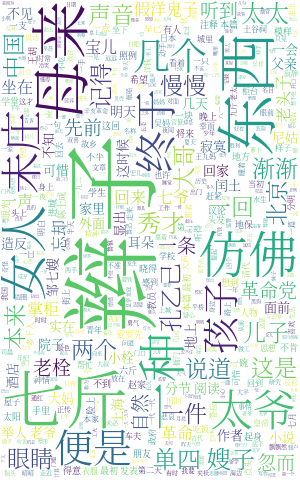

In [40]:
wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=back_coloring, max_font_size=100, random_state=42, width=1000, height=860, margin=2,)


wc.generate(jieba_processing_txt(text))
wc.to_image()

In [44]:
# create coloring from image
image_colors_default = ImageColorGenerator(back_coloring)

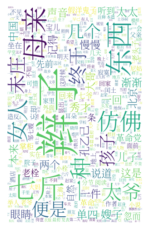

In [45]:
plt.figure()
# recolor wordcloud and show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# save wordcloud
wc.to_file(path.join(d, imgname1))

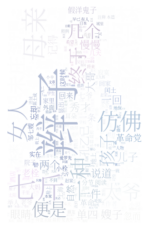

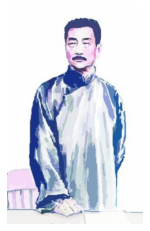

In [46]:
# create coloring from image
image_colors_byImg = ImageColorGenerator(back_coloring)

# show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors_byImg), interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(back_coloring, interpolation="bilinear")
plt.axis("off")
plt.show()

# save wordcloud
wc.to_file(path.join(d, imgname2))